In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

from sync_plots import calc_and_plot_Q_and_S, set_size, DOCUMENT_WIDTH
from sync_calcs import dm2bloch, get_disipators, signal_hamiltonian
from qutip import *

# Unitary Data

In [2]:
states = np.load('results/unitary/unitary-v2-corrected.npy')

# Populations
ups = [state[0, 0].real for state in states]
downs = [state[1, 1].real for state in states]

In [3]:
detuning = 5 * 3 * 0.1
signal_strength = 5 * 2 * 0.1

H = signal_hamiltonian(detuning, signal_strength)

t = np.linspace(0, 16, 100)

result = mesolve(H, ket2dm(basis(2, 0)), t * 0.2)

cont_ups = [state[0, 0].real for state in result.states]
cont_downs = [state[1, 1].real for state in result.states]

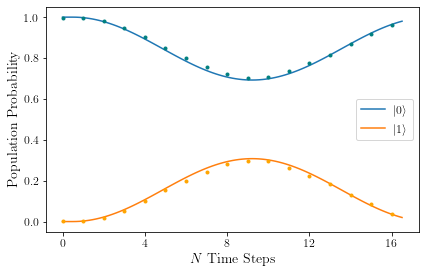

In [4]:
fig, ax = plt.subplots(figsize=set_size(DOCUMENT_WIDTH))

ax.plot([0, *(t + 0.5)], [1, *cont_ups], "-", label=r"$|0\rangle$")
ax.plot([0, *(t + 0.5)], [0, *cont_downs], "-", label=r"$|1\rangle$")
ax.plot(ups, ".", c="teal")
ax.plot(downs, ".", c="orange")

ax.set_xlabel("$N$ Time Steps")
ax.set_ylabel("Population Probability")
ax.legend()
ax.xaxis.set_major_locator(MultipleLocator(base=4))

fig.savefig("results/unitary/population-cycle.pdf", bbox_inches="tight")


In [5]:
# Coherences
coh_arg = [np.angle(state[1, 0]) / np.pi for state in states]
coh_mod = [np.abs(state[1, 0]) for state in states]

cont_coh_arg = [np.angle(state[1, 0]) / np.pi for state in result.states]
cont_coh_mod = [np.abs(state[1, 0]) for state in result.states]

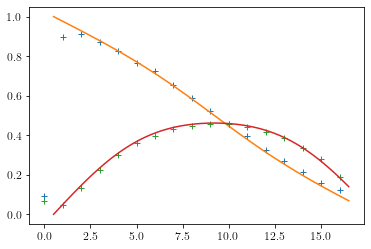

In [6]:
fig, ax = plt.subplots()

ax.plot(coh_arg, "+")
ax.plot(t + 0.5, -np.array(cont_coh_arg) + 1, "-")
ax.plot(coh_mod, "+")
ax.plot(t + 0.5, cont_coh_mod, "-")


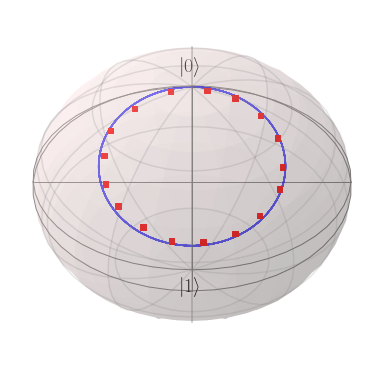

In [7]:
detuning = 0.3
signal_strength = 0.2

H = signal_hamiltonian(detuning, signal_strength)
result = mesolve(H, basis(2, 0), np.linspace(0, 100, 1000))

b = Bloch()
points = dm2bloch([Qobj(s) for s in states])
b.add_points(dm2bloch(result.states), 'l')
b.add_points(points, meth="s")
b.view = [0, 40]
b.xlabel = ['', '']
b.ylabel = ['', '']
b.show()

b.fig.savefig("results/unitary/bloch-sphere-cycle.pdf")

# Unitary + Loss

In [8]:
data = []

for i in range(2, 8):
    d = np.load(f'loss-4-steps-{i}-corrected.npy')
    data.append(d)

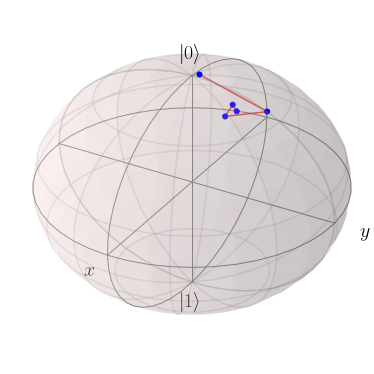

In [9]:
mean_states = np.mean(data, axis=0)
std_states = np.std(data, axis=0)
b = Bloch()
points = dm2bloch(mean_states)
b.add_points(points, meth="s")
b.add_points(points, meth="l")
# b.view = [0, 70]
b.show()

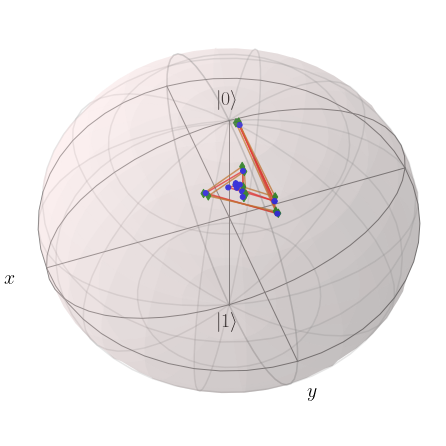

In [10]:
b = Bloch(figsize=[6, 6])

for d in data:
    points = dm2bloch(d)
    b.add_points(points, meth="s")
    b.add_points(points, meth="l")

b.view = [-20, 50]
b.show()

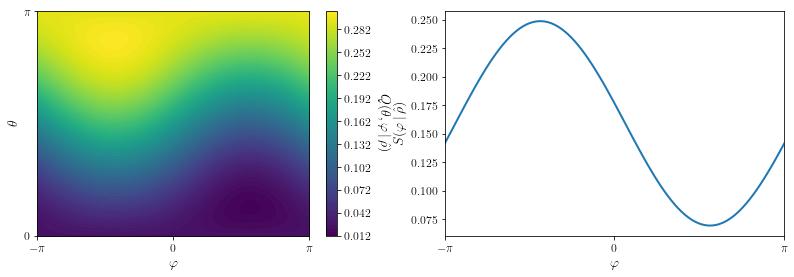

In [11]:
from sync_plots import calc_and_plot_Q_and_S
from qiskit.quantum_info import partial_trace

ss = mean_states[-1]
fig, *_ = calc_and_plot_Q_and_S(Qobj(ss), method="qutip")

fig.savefig("results/q-func-sync-measure.pdf", bbox_inches="tight")